# 2. Seguir el ejemplo presentado en “Getting Started” para aprender a utilizar el código

In [1]:
#imports 
import astropy.units as u
import numpy as np
import gala.potential as gp
import gala.dynamics as gd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


## Modelo de potencial de la Vía Lactea

In [2]:
mw = gp.MilkyWayPotential()
mw

<CompositePotential disk,bulge,nucleus,halo>

## Computo de la energía potencial y aceleración  cerca del Sol en coordenadas cartesianas

In [3]:
xyz = [8.3, 0, 0] * u.kpc
mw.energy(xyz)

<Quantity [-0.16234007] kpc2 / Myr2>

In [4]:
#??????????????????
mw.acceleration(xyz)

<Quantity [[-0.00673346],
           [-0.        ],
           [-0.        ]] kpc / Myr2>

## Manejo de unidades del paquete

In [5]:
E = mw.energy(xyz)
E.to(u.km**2/u.s**2)

<Quantity [-155209.70518228] km2 / s2>

In [6]:
acc = mw.acceleration(xyz)
acc.to(u.km/u.s/u.Myr)

<Quantity [[-6.58392753],
           [-0.        ],
           [-0.        ]] km / (Myr s)>

## Calculo de orbitas

### Seteo de parametros iniciales

In [7]:
w0 = gd.PhaseSpacePosition(pos=[8.3, 0, 0] * u.kpc,
                            vel=[13,245,8] * u.km/u.s)


### Unidades que hace uso el modelo potencial de la Vía Lactea de Gala

In [8]:
mw.units

<UnitSystem (kpc, Myr, solMass, rad)>

### Integración de una orbita 

In [9]:
orbit = mw.integrate_orbit(w0, dt=1*u.Myr,t1=0, t2=2*u.Gyr)

### Ploteo de una orbita

#### Coordenadas Cartesianas

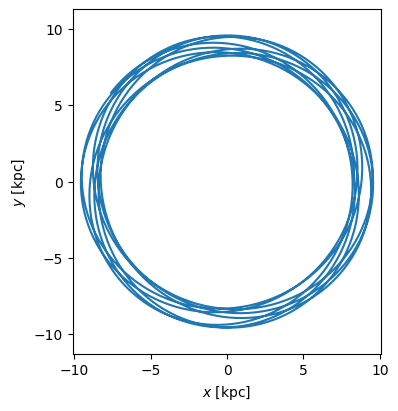

In [10]:
fig1 = orbit.plot(['x', 'y'])

#### Coordenadas Cilindricas

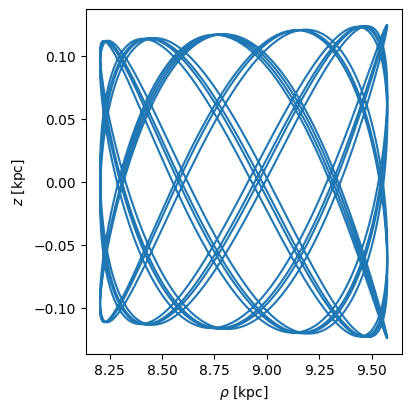

In [11]:
fig2 = orbit.cylindrical.plot(['rho', 'z'])

#### Parametros 

In [12]:
orbit.pericenter()

<Quantity 8.20466247 kpc>

In [13]:
orbit.apocenter()

<Quantity 9.57533987 kpc>

In [14]:
orbit.eccentricity()

<Quantity 0.07709096>

# 3. Seleccionar las componentes de un potencial gravitatorio adecuado para una g a l a x i a L * d e l t i p o t a rd í o . Q u é componentes principales debemos elegir?
# (Obviar perturbaciones de segundo orden)
# Definir sus propios parámetros!

## Construccion del potencial de una Galaxia de tipo tardio

In [15]:
#Masa total de la galaxia y su componente barionica
M_total = 2E12 * u.Msun
M_bar = .27 * M_total

In [16]:
#Potencial de la galaxia construidas en base a la masa total y la masa barionica
#con la mas del halo = 0.9*M_total, la masa del disco = 0.5*M_bar, la masa del bulbo = 0.05*M_bar y la masa del core = 0.001*M_bar

halo = gp.HernquistPotential(m=0.9*M_total, c=20, units=mw.units)
disk = gp.MiyamotoNagaiPotential(m=0.5*M_bar, a=3., b=0.28, units=mw.units)
bulge = gp.HernquistPotential(m=0.05*M_bar, c=0.7, units=mw.units)
core = gp.PlummerPotential(m=0.001*M_bar, b=0.1, units=mw.units)

wahm_gal = halo + disk + bulge + core

# 4. Calcular las curvas de velocidad para:


## a) cada componente
## b) el sistema total

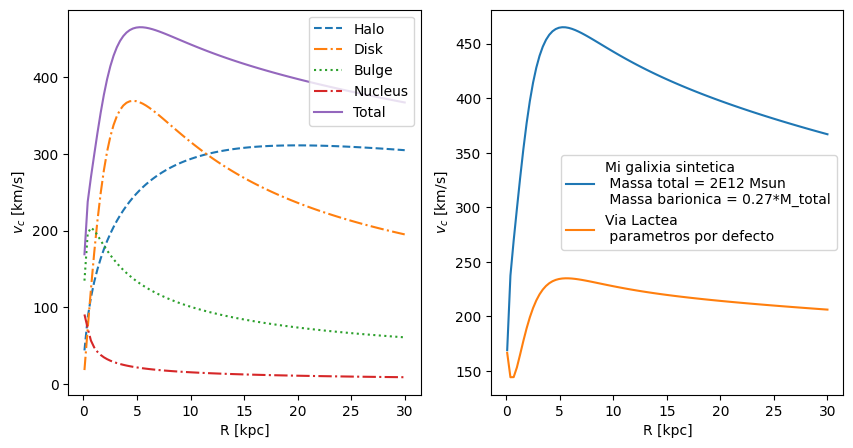

In [17]:
R_grid = np.linspace(0.1, 30, 100) * u.kpc
xyz = np.zeros((3,) + R_grid.shape) * halo.units["length"]
xyz[0] = R_grid

vcirc_mw = mw.circular_velocity(xyz)
vcirc_halo = halo.circular_velocity(xyz)
vcirc_disk = disk.circular_velocity(xyz)
vcirc_bulge = bulge.circular_velocity(xyz)
vcirc_core = core.circular_velocity(xyz)
vcirc_gal = wahm_gal.circular_velocity(xyz)

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.plot(R_grid, vcirc_halo, label='Halo',linestyle='--')
ax.plot(R_grid, vcirc_disk, label='Disk',linestyle='-.')
ax.plot(R_grid, vcirc_bulge, label='Bulge',linestyle=':')
ax.plot(R_grid, vcirc_core, label='Nucleus',linestyle='-.')
ax.plot(R_grid, vcirc_gal, label='Total')
ax.set_xlabel('R [kpc]')
ax.set_ylabel(r'$v_c$ [km/s]')
ax.legend()

ax = fig.add_subplot(gs[0, 1])
ax.plot(R_grid, vcirc_gal, label='Mi galixia sintetica \n Massa total = 2E12 Msun \n Massa barionica = 0.27*M_total')
ax.plot(R_grid, vcirc_mw, label='Via Lactea \n parametros por defecto')
ax.set_xlabel('R [kpc]')
ax.set_ylabel(r'$v_c$ [km/s]')
ax.legend()
plt.show()

# 5. Utilizando solo el potencial esferico asociado al halo de materia oscura, elegir condiciones iniciales para órbitas
## a) Cerrada (E < 0 km/seg2)
## b) Hiperbólica (E > 0 km/seg2)

In [18]:
#parametros iniciales para obitas abierta y cerrada a distancia solar del nucleo galactico

w0_open = gd.PhaseSpacePosition(pos=[40, 80, -40] * u.kpc,
                                
                                 vel=[-280,-100,280] * u.km/u.s)

w0_closed = gd.PhaseSpacePosition(pos=[8, 0, 2] * u.kpc,

                                  vel=[-80,245,60] * u.km/u.s)

In [28]:
#Integrando las orbitas con el potencial del halo de materia oscura 

orbit_open = halo.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=10*u.Gyr)
orbit_closed = halo.integrate_orbit(w0_closed, dt=1*u.Myr, t1=0, t2=10*u.Gyr)


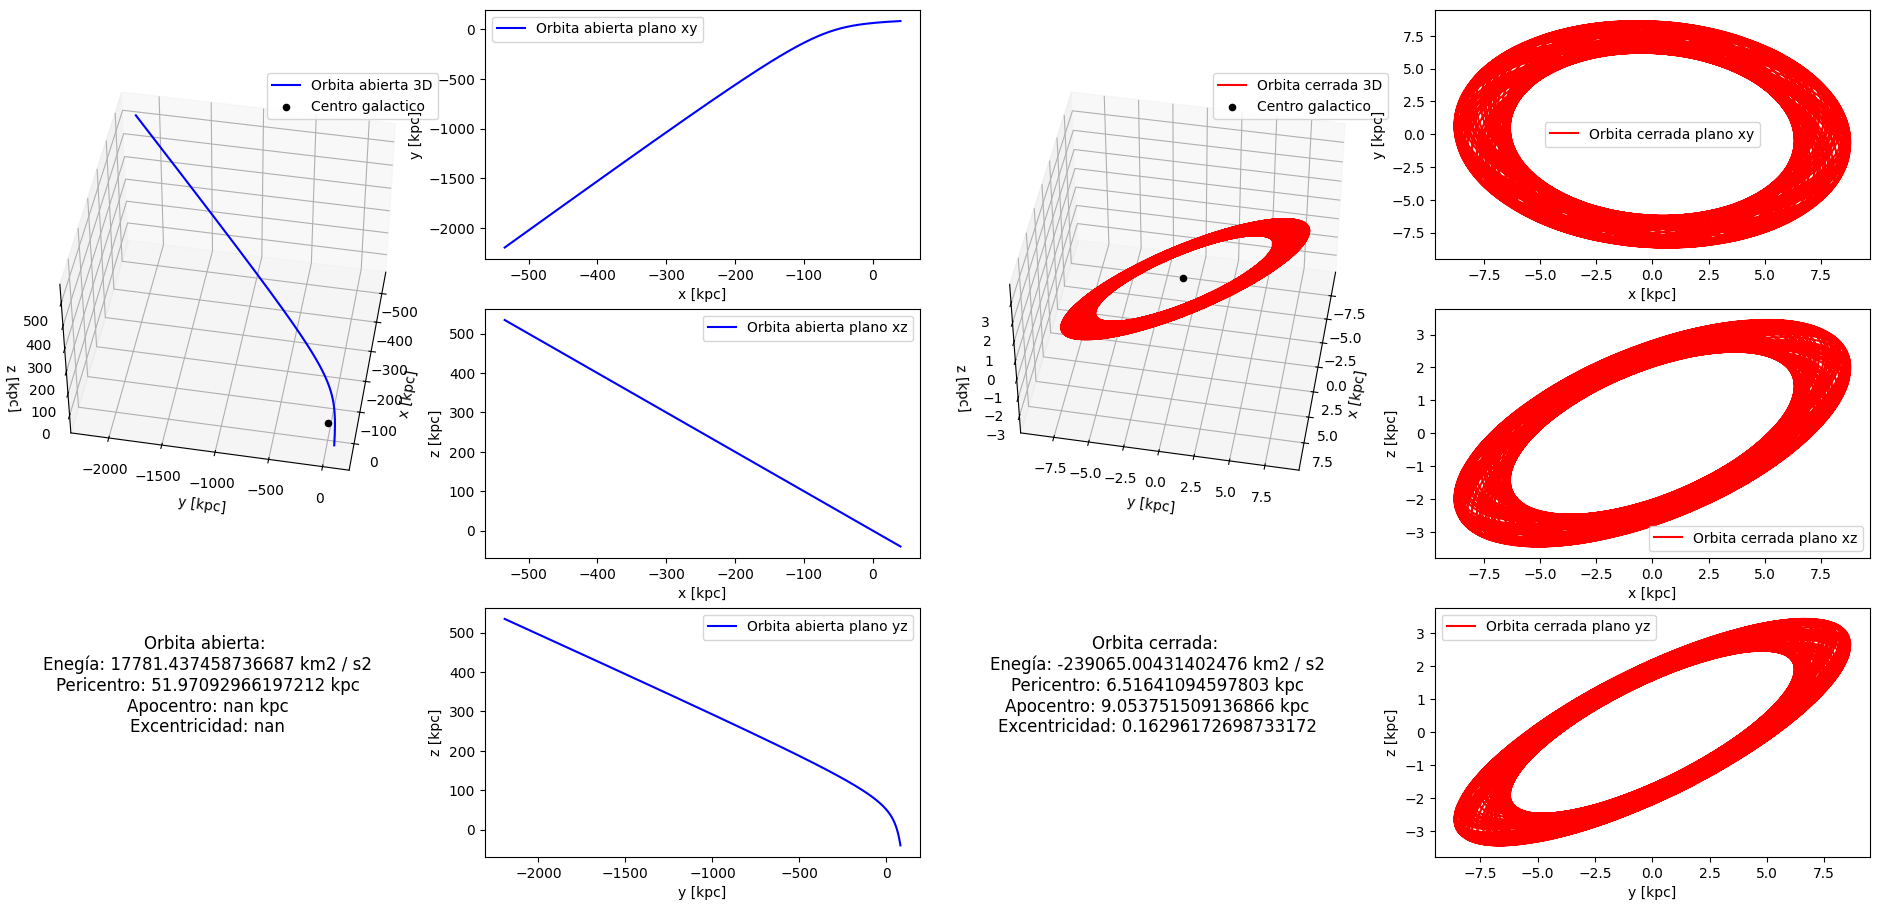

In [29]:
fig = plt.figure(figsize=(24,11))
gs = gridspec.GridSpec(3, 8)


ax = fig.add_subplot(gs[:2, :2],projection='3d')
ax.plot(orbit_open.x, orbit_open.y, orbit_open.z, label='Orbita abierta 3D',c='b')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[0, 2:4])
ax.plot(orbit_open.x, orbit_open.y, label='Orbita abierta plano xy',c='b')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[1, 2:4])
ax.plot(orbit_open.x, orbit_open.z, label='Orbita abierta plano xz',c='b')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[2, 2:4])
ax.plot(orbit_open.y, orbit_open.z, label='Orbita abierta plano yz',c='b')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[2,0])
ax.text(1, 0.5, 'Orbita abierta: \n'+
        'Enegía: '+ str(orbit_open.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_open.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_open.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_open.eccentricity()), fontsize=12, ha='center')
ax.axis('off')



ax = fig.add_subplot(gs[:2, 4:6],projection='3d')
ax.plot(orbit_closed.x, orbit_closed.y, orbit_closed.z, label='Orbita cerrada 3D',c='r')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[0, 6:])
ax.plot(orbit_closed.x, orbit_closed.y, label='Orbita cerrada plano xy',c='r')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[1, 6:])
ax.plot(orbit_closed.x, orbit_closed.z, label='Orbita cerrada plano xz',c='r')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[2, 6:])
ax.plot(orbit_closed.y, orbit_closed.z, label='Orbita cerrada plano yz',c='r')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[2,4])
ax.text(1, 0.5, 'Orbita cerrada: \n'+
        'Enegía: '+ str(orbit_closed.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_closed.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_closed.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_closed.eccentricity()), fontsize=12, ha='center')
ax.axis('off')


plt.show()






# 6. Integrar esas órbitas, agregando de forma iterativa, las componentes del potencial; e.g., 1ero: solo DM halo, 2do: DM halo + additional component, etc.
# 7. Para cada una de estas órbitas, calcular el apocentro, pericentro y eccentricidad 

In [21]:
#Potencial de la galaxia 
halo_disk = halo + disk
halo_disk_bulge = halo + disk + bulge
halo_disk_bulge_core = halo + disk + bulge + core


In [26]:
orbit_halo = halo.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=5*u.Gyr)
orbit_halo_disk = halo_disk.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=2*u.Gyr)
orbit_halo_disk_bulge = halo_disk_bulge.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=2*u.Gyr)
orbit_halo_disk_bulge_core = halo_disk_bulge_core.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=2*u.Gyr)


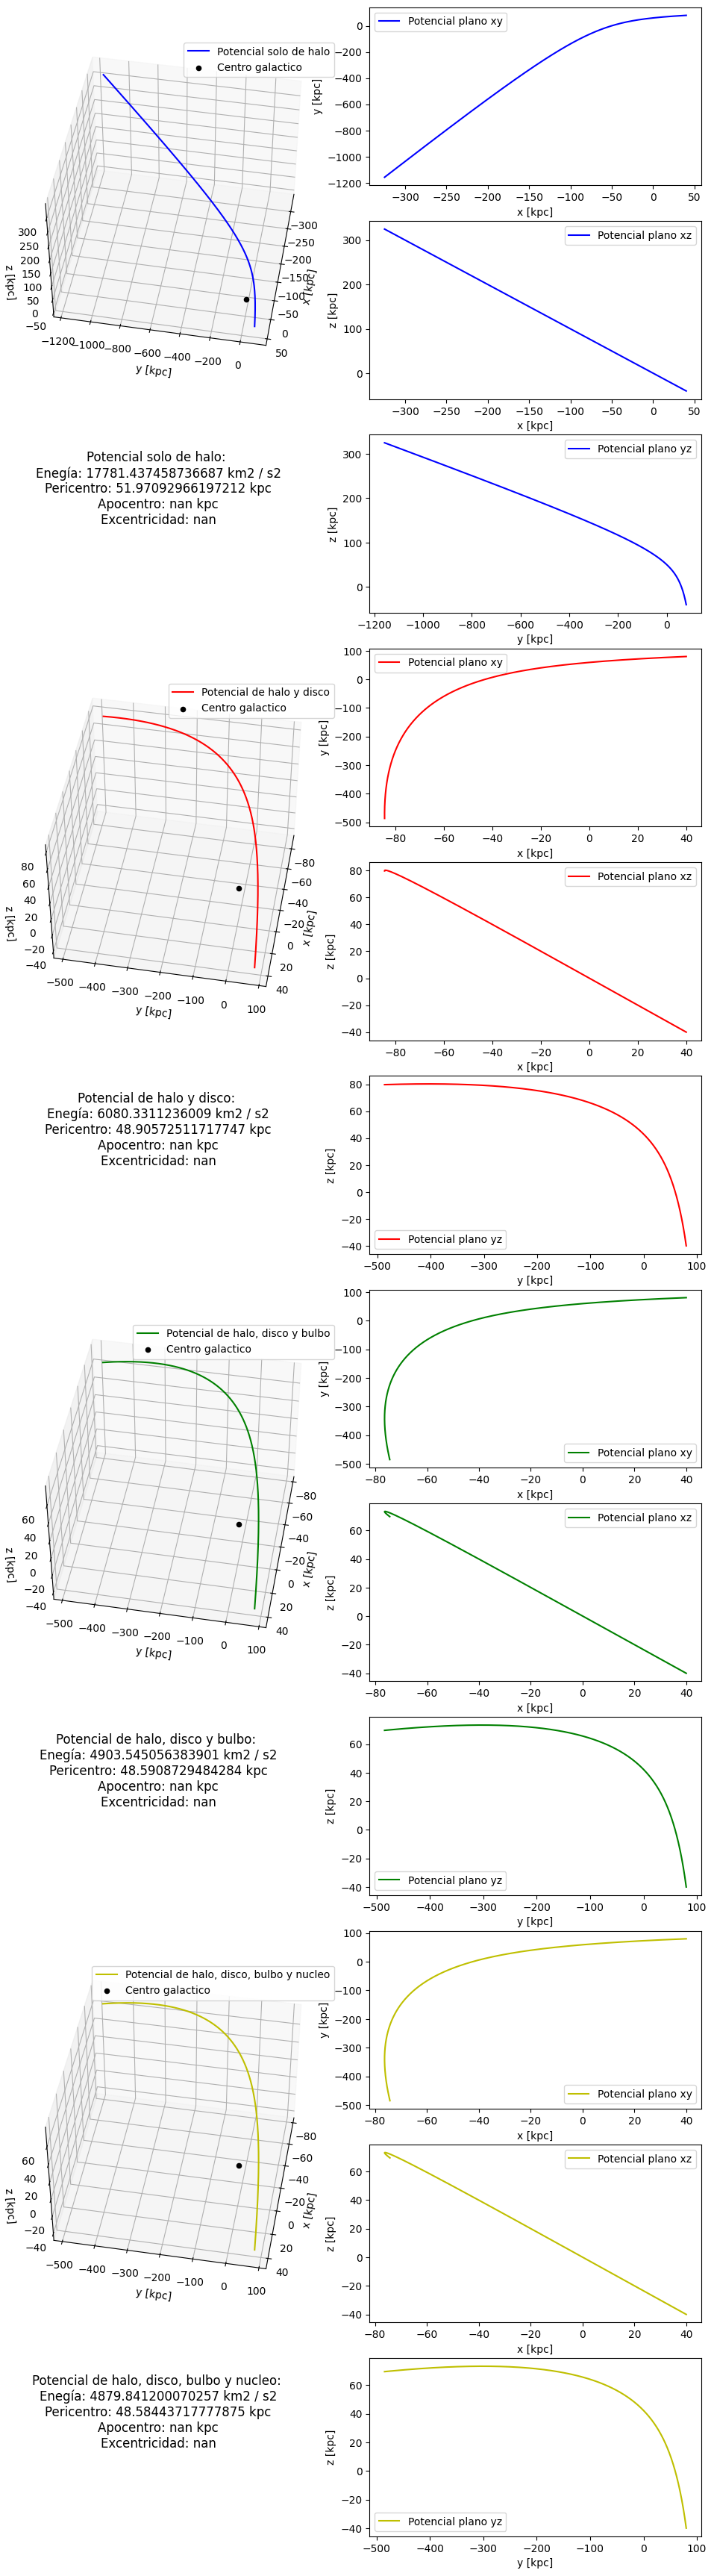

In [27]:
fig = plt.figure(figsize=(12,44))
gs = gridspec.GridSpec(12,4)

ax = fig.add_subplot(gs[0:2,:2],projection='3d')
ax.plot(orbit_halo.x, orbit_halo.y, orbit_halo.z, label='Potencial solo de halo',c='b')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[0, 2:4])
ax.plot(orbit_halo.x, orbit_halo.y, label='Potencial plano xy',c='b')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[1, 2:4])
ax.plot(orbit_halo.x, orbit_halo.z, label='Potencial plano xz',c='b')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[2, 2:4])
ax.plot(orbit_halo.y, orbit_halo.z, label='Potencial plano yz',c='b')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[2,0])
ax.text(1, 0.5, 'Potencial solo de halo: \n'+
        'Enegía: '+ str(orbit_halo.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_halo.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_halo.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_halo.eccentricity()), fontsize=12, ha='center')
ax.axis('off')


ax = fig.add_subplot(gs[3:5,:2],projection='3d')
ax.plot(orbit_halo_disk.x, orbit_halo_disk.y, orbit_halo_disk.z, label='Potencial de halo y disco',c='r')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[3, 2:4])
ax.plot(orbit_halo_disk.x, orbit_halo_disk.y, label='Potencial plano xy',c='r')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[4, 2:4])
ax.plot(orbit_halo_disk.x, orbit_halo_disk.z, label='Potencial plano xz',c='r')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[5, 2:4])
ax.plot(orbit_halo_disk.y, orbit_halo_disk.z, label='Potencial plano yz',c='r')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[5,0])
ax.text(1, 0.5, 'Potencial de halo y disco: \n'+
        'Enegía: '+ str(orbit_halo_disk.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_halo_disk.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_halo_disk.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_halo_disk.eccentricity()), fontsize=12, ha='center')
ax.axis('off')


ax = fig.add_subplot(gs[6:8,:2],projection='3d')
ax.plot(orbit_halo_disk_bulge.x, orbit_halo_disk_bulge.y, orbit_halo_disk_bulge.z, label='Potencial de halo, disco y bulbo',c='g')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[6, 2:4])
ax.plot(orbit_halo_disk_bulge.x, orbit_halo_disk_bulge.y, label='Potencial plano xy',c='g')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[7, 2:4])
ax.plot(orbit_halo_disk_bulge.x, orbit_halo_disk_bulge.z, label='Potencial plano xz',c='g')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[8, 2:4])
ax.plot(orbit_halo_disk_bulge.y, orbit_halo_disk_bulge.z, label='Potencial plano yz',c='g')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[8,0])
ax.text(1, 0.5, 'Potencial de halo, disco y bulbo: \n'+
        'Enegía: '+ str(orbit_halo_disk_bulge.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_halo_disk_bulge.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_halo_disk_bulge.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_halo_disk_bulge.eccentricity()), fontsize=12, ha='center')
ax.axis('off')


ax = fig.add_subplot(gs[9:11,:2],projection='3d')
ax.plot(orbit_halo_disk_bulge_core.x, orbit_halo_disk_bulge_core.y, orbit_halo_disk_bulge_core.z, label='Potencial de halo, disco, bulbo y nucleo',c='y')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[9, 2:4])
ax.plot(orbit_halo_disk_bulge_core.x, orbit_halo_disk_bulge_core.y, label='Potencial plano xy',c='y')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[10, 2:4])
ax.plot(orbit_halo_disk_bulge_core.x, orbit_halo_disk_bulge_core.z, label='Potencial plano xz',c='y')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[11, 2:4])
ax.plot(orbit_halo_disk_bulge_core.y, orbit_halo_disk_bulge_core.z, label='Potencial plano yz',c='y')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[11,0])
ax.text(1, 0.5, 'Potencial de halo, disco, bulbo y nucleo: \n'+
        'Enegía: '+ str(orbit_halo_disk_bulge_core.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_halo_disk_bulge_core.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_halo_disk_bulge_core.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_halo_disk_bulge_core.eccentricity()), fontsize=12, ha='center')
ax.axis('off')

plt.show()

In [34]:
orbit_halo = halo.integrate_orbit(w0_closed, dt=1*u.Myr, t1=0, t2=15*u.Gyr)
orbit_halo_disk = halo_disk.integrate_orbit(w0_closed, dt=1*u.Myr, t1=0, t2=15*u.Gyr)
orbit_halo_disk_bulge = halo_disk_bulge.integrate_orbit(w0_closed, dt=1*u.Myr, t1=0, t2=15*u.Gyr)
orbit_halo_disk_bulge_core = halo_disk_bulge_core.integrate_orbit(w0_closed, dt=1*u.Myr, t1=0, t2=15*u.Gyr)


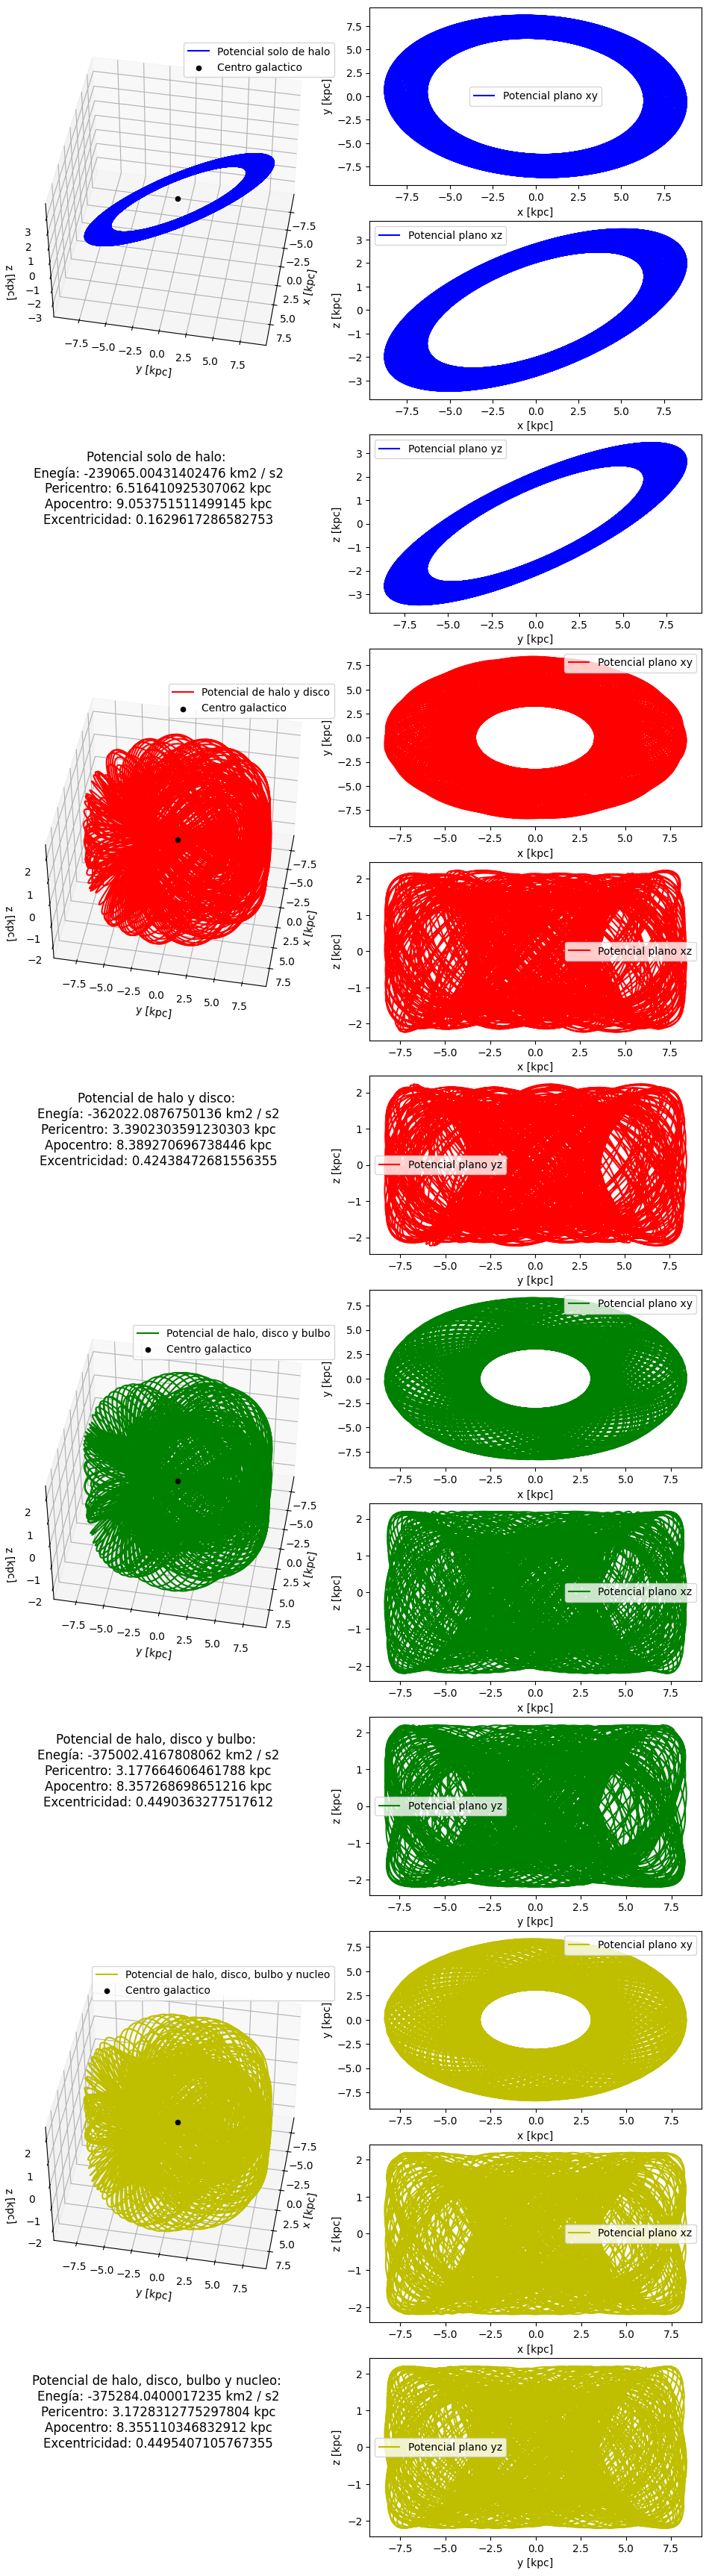

In [35]:
fig = plt.figure(figsize=(12,44))
gs = gridspec.GridSpec(12,4)

ax = fig.add_subplot(gs[0:2,:2],projection='3d')
ax.plot(orbit_halo.x, orbit_halo.y, orbit_halo.z, label='Potencial solo de halo',c='b')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[0, 2:4])
ax.plot(orbit_halo.x, orbit_halo.y, label='Potencial plano xy',c='b')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[1, 2:4])
ax.plot(orbit_halo.x, orbit_halo.z, label='Potencial plano xz',c='b')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[2, 2:4])
ax.plot(orbit_halo.y, orbit_halo.z, label='Potencial plano yz',c='b')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[2,0])
ax.text(1, 0.5, 'Potencial solo de halo: \n'+
        'Enegía: '+ str(orbit_halo.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_halo.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_halo.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_halo.eccentricity()), fontsize=12, ha='center')
ax.axis('off')


ax = fig.add_subplot(gs[3:5,:2],projection='3d')
ax.plot(orbit_halo_disk.x, orbit_halo_disk.y, orbit_halo_disk.z, label='Potencial de halo y disco',c='r')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[3, 2:4])
ax.plot(orbit_halo_disk.x, orbit_halo_disk.y, label='Potencial plano xy',c='r')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[4, 2:4])
ax.plot(orbit_halo_disk.x, orbit_halo_disk.z, label='Potencial plano xz',c='r')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[5, 2:4])
ax.plot(orbit_halo_disk.y, orbit_halo_disk.z, label='Potencial plano yz',c='r')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[5,0])
ax.text(1, 0.5, 'Potencial de halo y disco: \n'+
        'Enegía: '+ str(orbit_halo_disk.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_halo_disk.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_halo_disk.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_halo_disk.eccentricity()), fontsize=12, ha='center')
ax.axis('off')


ax = fig.add_subplot(gs[6:8,:2],projection='3d')
ax.plot(orbit_halo_disk_bulge.x, orbit_halo_disk_bulge.y, orbit_halo_disk_bulge.z, label='Potencial de halo, disco y bulbo',c='g')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[6, 2:4])
ax.plot(orbit_halo_disk_bulge.x, orbit_halo_disk_bulge.y, label='Potencial plano xy',c='g')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[7, 2:4])
ax.plot(orbit_halo_disk_bulge.x, orbit_halo_disk_bulge.z, label='Potencial plano xz',c='g')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[8, 2:4])
ax.plot(orbit_halo_disk_bulge.y, orbit_halo_disk_bulge.z, label='Potencial plano yz',c='g')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[8,0])
ax.text(1, 0.5, 'Potencial de halo, disco y bulbo: \n'+
        'Enegía: '+ str(orbit_halo_disk_bulge.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_halo_disk_bulge.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_halo_disk_bulge.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_halo_disk_bulge.eccentricity()), fontsize=12, ha='center')
ax.axis('off')


ax = fig.add_subplot(gs[9:11,:2],projection='3d')
ax.plot(orbit_halo_disk_bulge_core.x, orbit_halo_disk_bulge_core.y, orbit_halo_disk_bulge_core.z, label='Potencial de halo, disco, bulbo y nucleo',c='y')
ax.scatter(0, 0, 0, color='black', label='Centro galactico')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.view_init(45, 10)
ax.legend()

ax = fig.add_subplot(gs[9, 2:4])
ax.plot(orbit_halo_disk_bulge_core.x, orbit_halo_disk_bulge_core.y, label='Potencial plano xy',c='y')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.legend()

ax = fig.add_subplot(gs[10, 2:4])
ax.plot(orbit_halo_disk_bulge_core.x, orbit_halo_disk_bulge_core.z, label='Potencial plano xz',c='y')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[11, 2:4])
ax.plot(orbit_halo_disk_bulge_core.y, orbit_halo_disk_bulge_core.z, label='Potencial plano yz',c='y')
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')
ax.legend()

ax = fig.add_subplot(gs[11,0])
ax.text(1, 0.5, 'Potencial de halo, disco, bulbo y nucleo: \n'+
        'Enegía: '+ str(orbit_halo_disk_bulge_core.energy()[0].to(u.km**2/u.s**2))+'\n'+
        'Pericentro: '+ str(orbit_halo_disk_bulge_core.pericenter())+'\n'+
        'Apocentro: '+ str(orbit_halo_disk_bulge_core.apocenter())+'\n'+
        'Excentricidad: '+ str(orbit_halo_disk_bulge_core.eccentricity()), fontsize=12, ha='center')
ax.axis('off')

plt.show()

# 8. Comparar orbitas y discutir. Que ocurrio con cada una de ellas?

# En el caso de las orbitas cerradas se puede notar que las orbitas al aumentar la complejidad del potencial se vuelven mas complejas, a nivel cuantitativo para el potencial de la galaxia sintetica se puede notar la energia disminuye y que la componente que mayores efectos tiene para este caso es la componente del disco, aunque esto esta relacionado con la cantida de masa que se le asigna a cada componente del potencial.

# Por otro lado para el caso de las orbitas abierta, el efecto de las componente es menos notorio, pero que anivel cuantitativo, la componente del disco es la componente que mayor efecto tiene.